In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv("Mall_Customers.csv")

In [33]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
x = data.iloc[:, 3:].values

# **Dendrogram To Find Optimal Number Of Clusters**

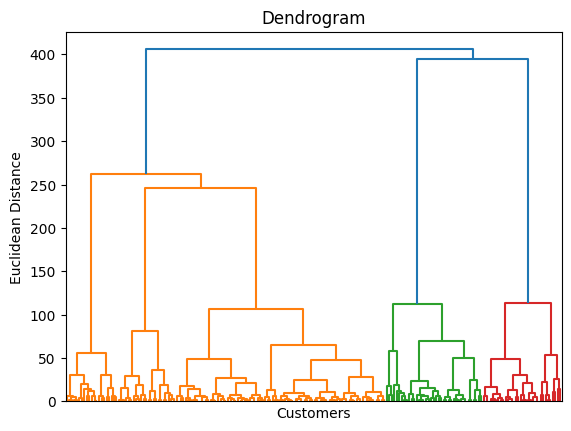

In [13]:
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as sch # Import the module and give it an alias

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward', metric = "euclidean"), no_labels = True) # Use the alias
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show() # Call the show function

# **Build Final Hierarchical Model**

In [24]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5) # other parameter: distance_threshold = 200, linkage = "ward"
hc.fit(x)

AgglomerativeClustering(n_clusters=5)

# **Visulization The Clusters**

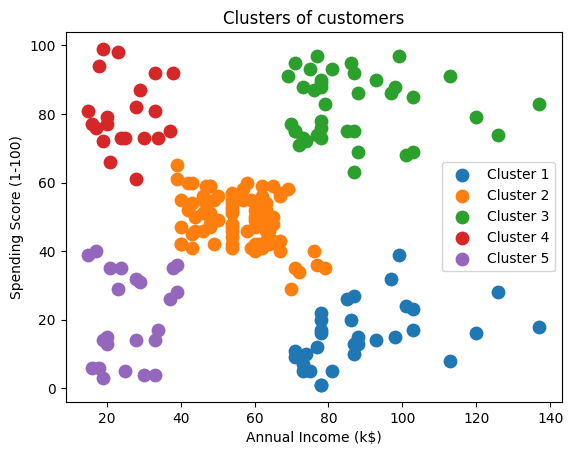

In [30]:
for i in range(hc.n_clusters):
  plt.scatter(x[hc.labels_ == i, 0], x[hc.labels_ == i, 1], s = 80, label = 'Cluster ' + str(i+1))

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()